In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

In [8]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-06-22 21:32:49--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  25.6MB/s    in 8.0s    

2020-06-22 21:32:58 (23.6 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [9]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [10]:
!ls

ml-20m	ml-20m.zip  sample_data


In [11]:
df =pd.read_csv('ml-20m/ratings.csv')

In [12]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [13]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [14]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [15]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [16]:
N = len(set(user_ids))
M = len(set(movie_ids))
K = 10

In [17]:
u = Input(shape=(1,))

m = Input(shape=(1,))

u_emb = Embedding(N,K)(u)

m_emb = Embedding(M,K)(m)

u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

x = Concatenate()([u_emb,m_emb])

x = Dense(1024, activation = 'relu')(x)
x = Dense(1)(x)

In [18]:
model = Model(inputs = [u,m], outputs = x)
model.compile(
    loss = 'mse',
    optimizer = SGD(lr=0.08, momentum =0.9)
)

In [19]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)

In [20]:
Ntrain = int(0.8* len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating


In [21]:
r = model.fit(
    x = [train_user, train_movie],
    y = train_ratings,
    epochs =25,
    batch_size = 1024,
    verbose=2,
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 51s - loss: 0.7783 - val_loss: 0.7214
Epoch 2/25
15626/15626 - 50s - loss: 0.7019 - val_loss: 0.6992
Epoch 3/25
15626/15626 - 50s - loss: 0.6804 - val_loss: 0.6883
Epoch 4/25
15626/15626 - 50s - loss: 0.6647 - val_loss: 0.6768
Epoch 5/25
15626/15626 - 49s - loss: 0.6541 - val_loss: 0.6705
Epoch 6/25
15626/15626 - 50s - loss: 0.6422 - val_loss: 0.6601
Epoch 7/25
15626/15626 - 48s - loss: 0.6256 - val_loss: 0.6479
Epoch 8/25
15626/15626 - 49s - loss: 0.6109 - val_loss: 0.6417
Epoch 9/25
15626/15626 - 48s - loss: 0.6010 - val_loss: 0.6400
Epoch 10/25
15626/15626 - 48s - loss: 0.5929 - val_loss: 0.6387
Epoch 11/25
15626/15626 - 47s - loss: 0.5852 - val_loss: 0.6377
Epoch 12/25
15626/15626 - 47s - loss: 0.5777 - val_loss: 0.6307
Epoch 13/25
15626/15626 - 49s - loss: 0.5698 - val_loss: 0.6300
Epoch 14/25
15626/15626 - 47s - loss: 0.5624 - val_loss: 0.6250
Epoch 15/25
15626/15626 - 47s - loss: 0.5564 - val_loss: 0.6229
Epoch 16/25
15626/15626 - 47s - loss: 0.5516 - va

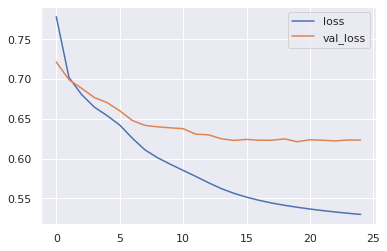

In [22]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [25]:
# on par with other approaches?
#https://datascience.stackexchange.com/questions/29740/benchmark-result-for-movielens-dataset
np.sqrt(0.6232)

0.789430174239622